# Intro Notes

- Non-linear models
- How non-linear?
    - quadratic
    - exponential
    - logistic
- Logistic implies data is categorical
- With a logistic regression, we can make a much more fundamental forecast - will the customer buy at all?

# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('2.01._Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


Like dummies, we must convert Yes/No to 1s and 0s.

In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [4]:
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

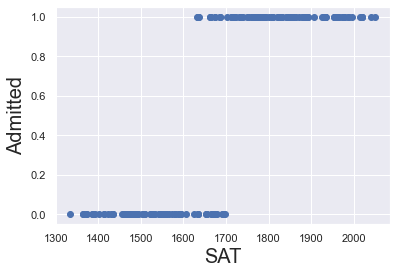

In [5]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

### Plot with a regression line

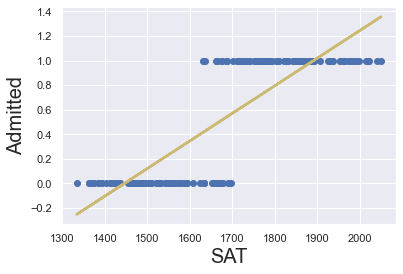

In [6]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color='C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

This regression doesn't even know that our values are bounded between 0 and 1.

Linear regression is a great technique, but is simply not fit for this kind of analysis

- 1st assumption of OLS was Linearity
    - this is violated

### Plot with logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


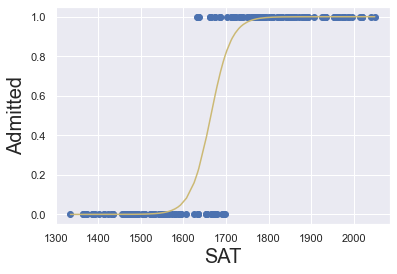

In [7]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

This function shows the probability of admission, given an SAT score.

# Logistic regression assumptions

1. Non-linear
2. No endogeneity
3. Normality and homoscedasticity
4. No autocorrelation
5. No multicollinearity

## Logistic model

- The logistic regression predicts the probability of an event ocurring
    - INPUT -> PROBABILITY

#### Logistic Regression Function

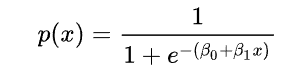

#### Logit function

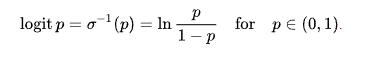

## Regression

Using statsmodels

In [8]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


Value of the 'objective function' at the 10th iteration

## Summary

In [9]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.7992
Time:                        15:59:40   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Maximum likelihood estimation (MLE)**
- Likelihood function:
    - a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables
    - the bigger the log likelihood function, the higher the probability that our model is correct
- MLE tries to maximize the log likelihood function
- The computer is going through different values, until it finds a model, for which the log likelihood is the highest
- When it can no longer improve it, it will just stop the optimization

**Log-Likelihood**
- The value of the log likelihood is almost but not always negative

**LL-Null (log-likelihood-null):**
- the log-likelihood of a model which has no independent variables
    - y = Bo*1

In [10]:
x0 = np.ones(168)
reg_log = sm.Logit(y,x0)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:               7.410e-11
Time:                        15:59:40   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

You may want to compare the log-likelihood of your model with the LL-null, to see if your model has any explanatory power.

**LLR (log likelihood ratio):**
- measures if our model is statistically different from LL-null, aka a useless model
    - our model is very low, so very significant

**Pseudo R-squared:**
- AIC
- BIC
- McFadden's R-squared
    - shown in statsmodels
    - a good Pseudo R-sqaured is somewhere between 0.2 and 0.4
    - mostly useful for comparing variations of the same model
    - different models will have completely different and incomparable Pseudo R-squared